Libraries + load data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================================
# Load Dataset
# ================================================================
csv_path = "HR_Analytics.csv"       # change if needed
out_dir  = "mnt/data/hr_eda_figures"
os.makedirs(out_dir, exist_ok=True)

df = pd.read_csv(csv_path)
saved = []

# ================================================================
# Utility functions
# ================================================================
def save_and_show(filename: str, figsize=(8,5), dpi=150, tight=True):
    """Apply common sizing, save to disk, and display inline."""
    fig = plt.gcf()
    fig.set_size_inches(figsize[0], figsize[1])
    if tight:
        plt.tight_layout()
    path = os.path.join(out_dir, filename)
    plt.savefig(path, dpi=dpi, bbox_inches="tight")
    saved.append(path)
    plt.show()
    plt.close()

def rate_by_group(frame: pd.DataFrame, group_col: str, outcome_col: str, positive_label) -> pd.Series:
    """Compute P(outcome == positive_label | group)."""
    return frame.groupby(group_col)[outcome_col].apply(lambda s: np.mean((s == positive_label).astype(float)))

FileNotFoundError: [Errno 2] No such file or directory: 'HR_Analytics.csv'

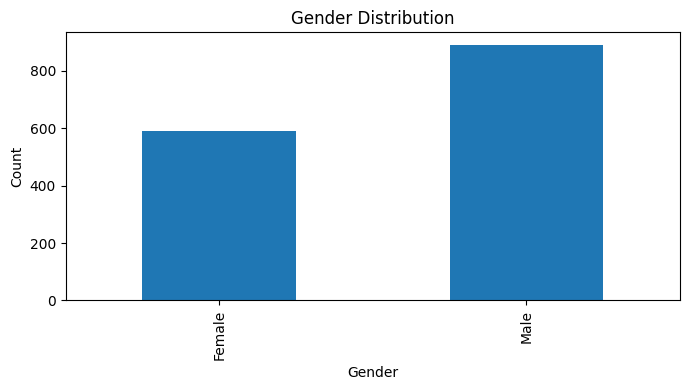

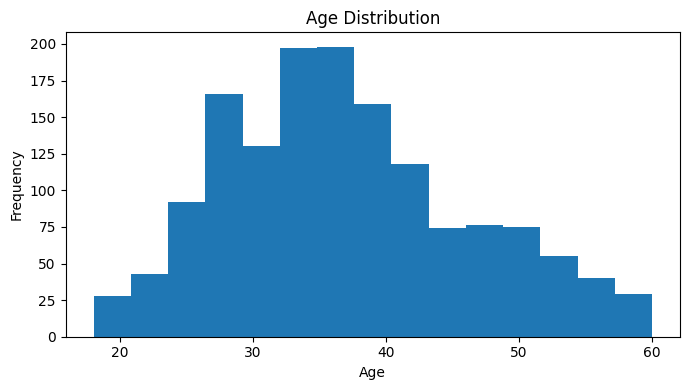

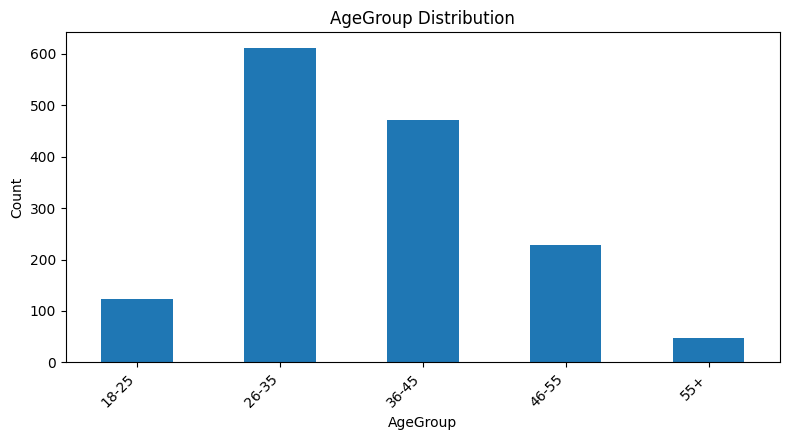

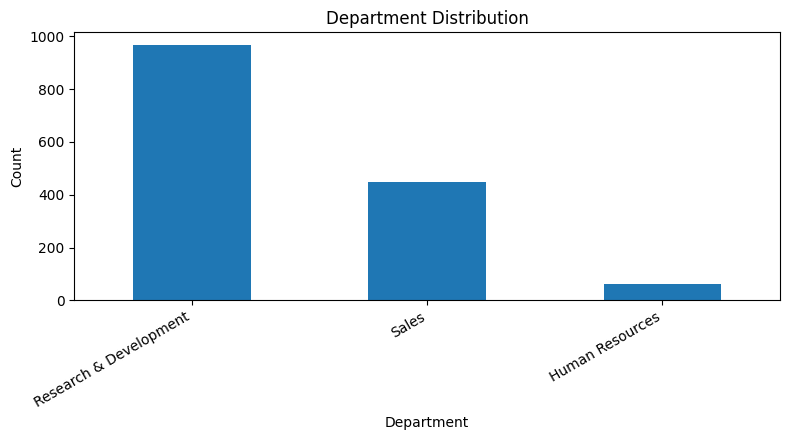

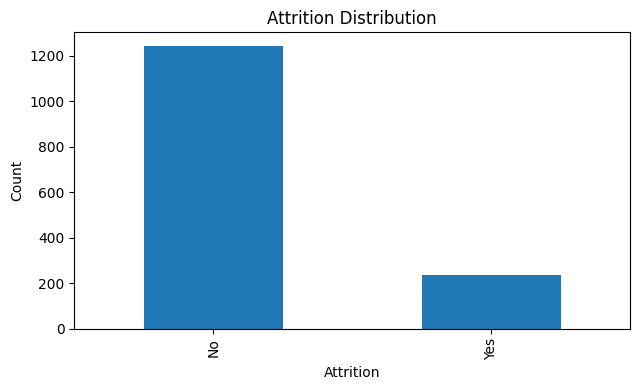

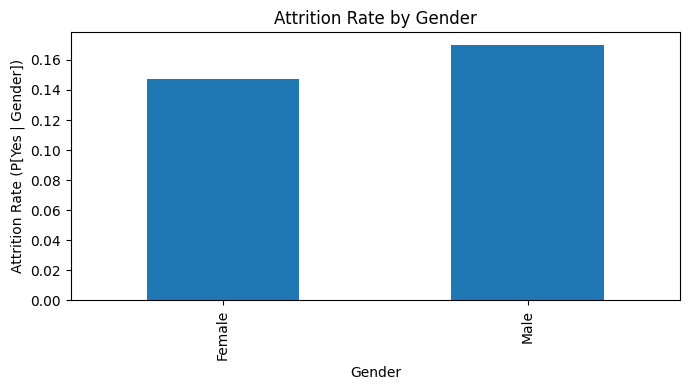

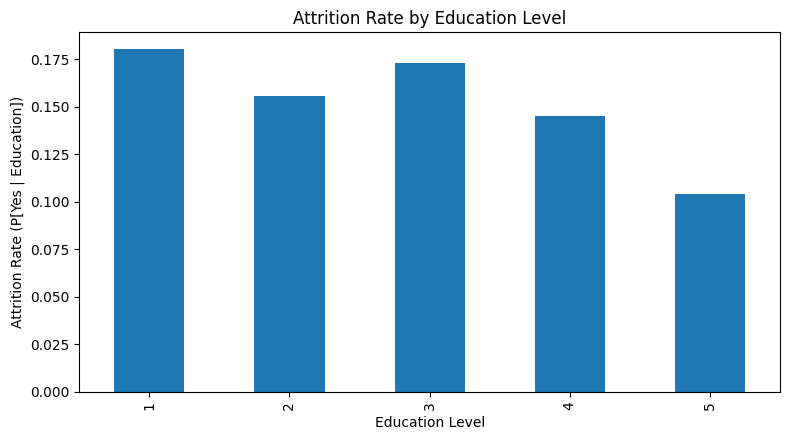

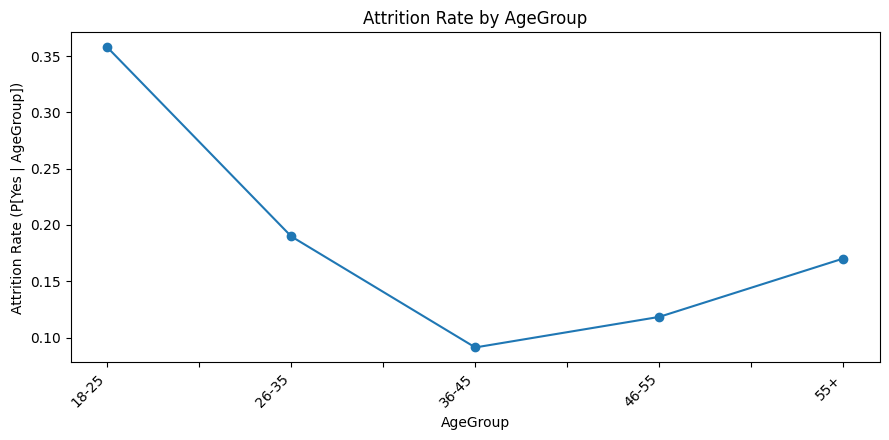

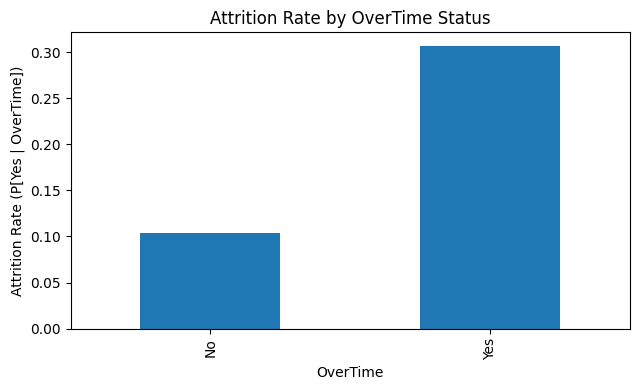

C:\Users\Andre\AppData\Local\Temp\ipykernel_32420\1786847492.py:145: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


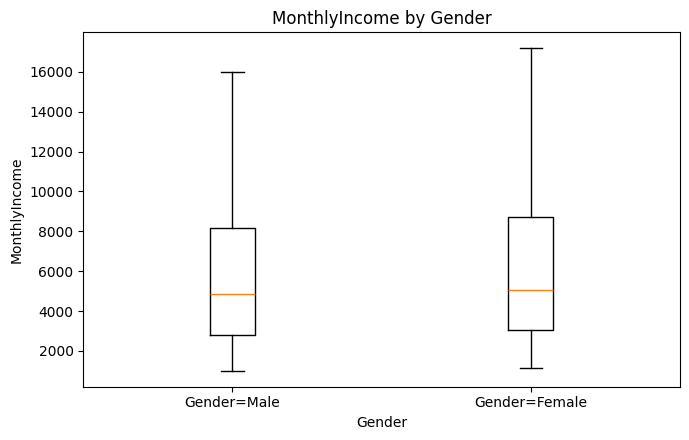

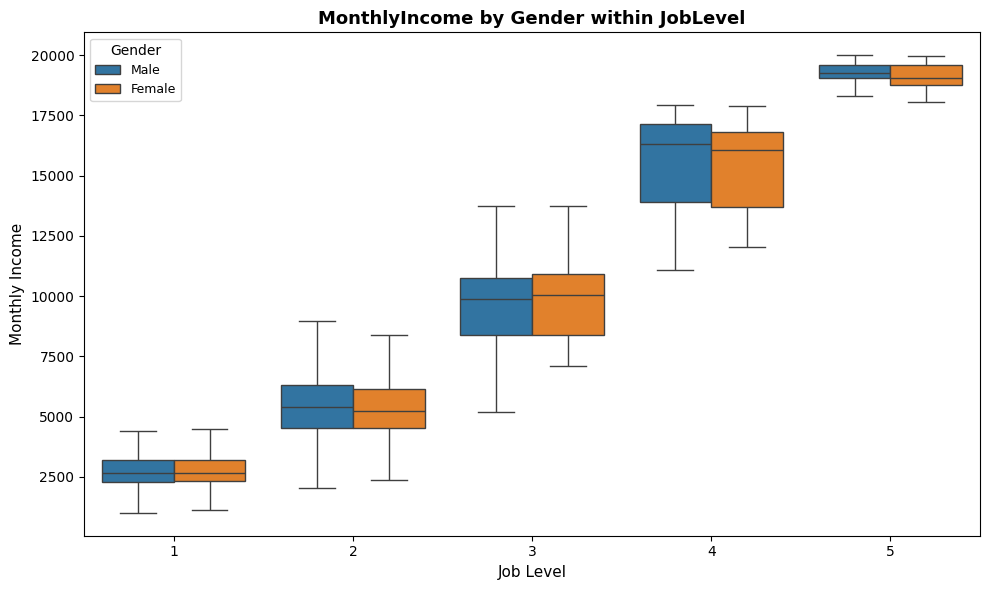

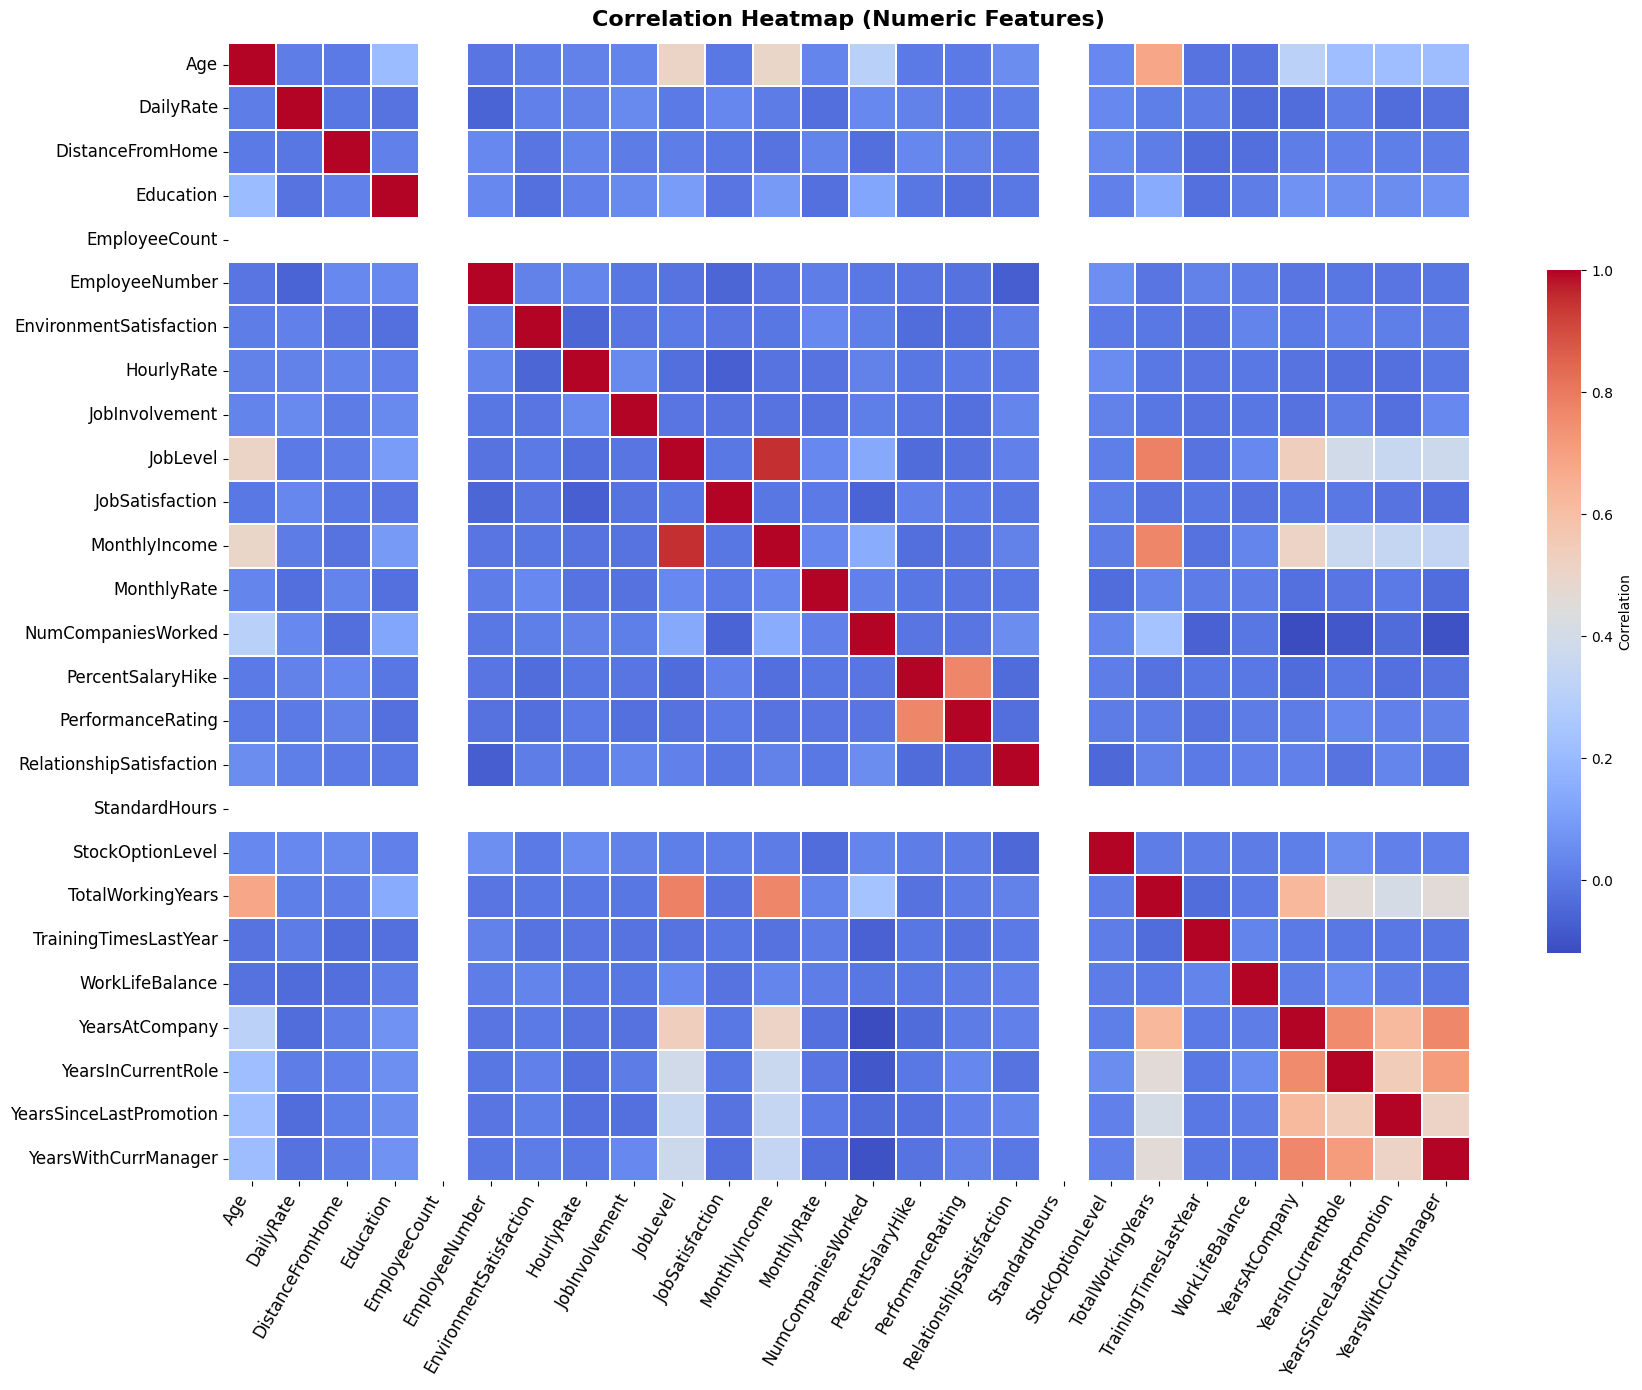

mnt/data/hr_eda_figures\02_age_histogram.png
mnt/data/hr_eda_figures\03_agegroup_distribution.png
mnt/data/hr_eda_figures\04_department_distribution.png
mnt/data/hr_eda_figures\05_attrition_distribution.png
mnt/data/hr_eda_figures\06_attrition_rate_by_gender.png
mnt/data/hr_eda_figures\07_attrition_rate_by_education.png
mnt/data/hr_eda_figures\08_attrition_rate_by_agegroup.png
mnt/data/hr_eda_figures\09_attrition_rate_by_overtime.png
mnt/data/hr_eda_figures\10_worklifebalance_by_attrition_boxplot.png
mnt/data/hr_eda_figures\11_monthlyincome_by_gender_boxplot.png
mnt/data/hr_eda_figures\14_continuous_features_boxplots.png
mnt/data/hr_eda_figures\01_gender_distribution.png
mnt/data/hr_eda_figures\02_age_histogram.png
mnt/data/hr_eda_figures\03_agegroup_distribution.png
mnt/data/hr_eda_figures\04_department_distribution.png
mnt/data/hr_eda_figures\05_attrition_distribution.png
mnt/data/hr_eda_figures\06_attrition_rate_by_gender.png
mnt/data/hr_eda_figures\07_attrition_rate_by_education.pn

In [ ]:
# 1. Gender Distribution

if "Gender" in df.columns:
    plt.figure()
    df["Gender"].value_counts(dropna=False).sort_index().plot(kind="bar")
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    save_and_show("01_gender_distribution.png", figsize=(7,4))

# 2. Age Histogram

if "Age" in df.columns:
    plt.figure()
    plt.hist(df["Age"].dropna(), bins=15)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    save_and_show("02_age_histogram.png", figsize=(7,4))


# 3. AgeGroup Distribution
# ================================================================
if "AgeGroup" in df.columns:
    plt.figure()
    df["AgeGroup"].value_counts().sort_index().plot(kind="bar")
    plt.title("AgeGroup Distribution")
    plt.xlabel("AgeGroup")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    save_and_show("03_agegroup_distribution.png", figsize=(8,4.5))

# ================================================================
# 4. Department Distribution
# ================================================================
if "Department" in df.columns:
    plt.figure()
    df["Department"].value_counts().sort_values(ascending=False).plot(kind="bar")
    plt.title("Department Distribution")
    plt.xlabel("Department")
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    save_and_show("04_department_distribution.png", figsize=(8,4.5))

# ================================================================
# 5. Attrition Distribution
# ================================================================
if "Attrition" in df.columns:
    plt.figure()
    df["Attrition"].value_counts().sort_index().plot(kind="bar")
    plt.title("Attrition Distribution")
    plt.xlabel("Attrition")
    plt.ylabel("Count")
    save_and_show("05_attrition_distribution.png", figsize=(6.5,4))

# ================================================================
# 6. Attrition Rate by Gender
# ================================================================
if set(["Attrition","Gender"]).issubset(df.columns):
    plt.figure()
    rate = rate_by_group(df, "Gender", "Attrition", "Yes")
    rate.loc[rate.index].plot(kind="bar")
    plt.title("Attrition Rate by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Attrition Rate (P[Yes | Gender])")
    save_and_show("06_attrition_rate_by_gender.png", figsize=(7,4))

# ================================================================
# 7. Attrition Rate by Education
# ================================================================
if set(["Attrition","Education"]).issubset(df.columns):
    plt.figure()
    rate = rate_by_group(df, "Education", "Attrition", "Yes").sort_index()
    rate.plot(kind="bar")
    plt.title("Attrition Rate by Education Level")
    plt.xlabel("Education Level")
    plt.ylabel("Attrition Rate (P[Yes | Education])")
    save_and_show("07_attrition_rate_by_education.png", figsize=(8,4.5))

# ================================================================
# 8. Attrition Rate by AgeGroup or binned Age
# ================================================================
if "Attrition" in df.columns:
    if "AgeGroup" in df.columns:
        plt.figure()
        order = sorted(df["AgeGroup"].dropna().unique())
        rates = rate_by_group(df, "AgeGroup", "Attrition", "Yes").reindex(order)
        rates.plot(kind="line", marker="o")
        plt.title("Attrition Rate by AgeGroup")
        plt.xlabel("AgeGroup")
        plt.ylabel("Attrition Rate (P[Yes | AgeGroup])")
        plt.xticks(rotation=45, ha="right")
        save_and_show("08_attrition_rate_by_agegroup.png", figsize=(9,4.5))
    elif "Age" in df.columns:
        bins = [18,25,30,35,40,45,50,60]
        labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
        tmp = df.copy()
        tmp["AgeBin"] = pd.cut(tmp["Age"], bins=bins, labels=labels, include_lowest=True)
        plt.figure()
        rates = rate_by_group(tmp, "AgeBin", "Attrition", "Yes").dropna()
        order = [lab for lab in labels if lab in rates.index]
        rates.loc[order].plot(kind="line", marker="o")
        plt.title("Attrition Rate by Age (Binned)")
        plt.xlabel("Age Bin")
        plt.ylabel("Attrition Rate (P[Yes | Age])")
        plt.xticks(rotation=0)
        save_and_show("08_attrition_rate_by_age_bin.png", figsize=(9,4.5))

# ================================================================
# 9. Attrition Rate by OverTime
# ================================================================
if set(["Attrition","OverTime"]).issubset(df.columns):
    plt.figure()
    rate = rate_by_group(df, "OverTime", "Attrition", "Yes")
    rate.loc[rate.index].plot(kind="bar")
    plt.title("Attrition Rate by OverTime Status")
    plt.xlabel("OverTime")
    plt.ylabel("Attrition Rate (P[Yes | OverTime])")
    save_and_show("09_attrition_rate_by_overtime.png", figsize=(6.5,4))

# # ================================================================
# # 10. WorkLifeBalance by Attrition (Boxplot)
# # ================================================================
# if set(["WorkLifeBalance","Attrition"]).issubset(df.columns):
#     plt.figure()
#     groups, labels = [], []
#     for val in df["Attrition"].dropna().unique():
#         groups.append(df.loc[df["Attrition"] == val, "WorkLifeBalance"].dropna().values)
#         labels.append(f"Attrition={val}")
#     plt.boxplot(groups, labels=labels, showfliers=False)
#     plt.title("WorkLifeBalance by Attrition")
#     plt.xlabel("Attrition Group")
#     plt.ylabel("WorkLifeBalance (1–4)")
#     save_and_show("10_worklifebalance_by_attrition_boxplot.png", figsize=(6.5,4))

# ================================================================
# 11. MonthlyIncome by Gender (Boxplot)
# ================================================================
if set(["MonthlyIncome","Gender"]).issubset(df.columns):
    plt.figure()
    groups, labels = [], []
    for val in df["Gender"].dropna().unique():
        groups.append(df.loc[df["Gender"] == val, "MonthlyIncome"].dropna().values)
        labels.append(f"Gender={val}")
    plt.boxplot(groups, labels=labels, showfliers=False)
    plt.title("MonthlyIncome by Gender")
    plt.xlabel("Gender")
    plt.ylabel("MonthlyIncome")
    save_and_show("11_monthlyincome_by_gender_boxplot.png", figsize=(7,4.5))

# ================================================================
# 12. MonthlyIncome by Gender within JobLevel (Grouped Boxplot)
# ================================================================
if set(["MonthlyIncome","Gender","JobLevel"]).issubset(df.columns):
    plt.figure(figsize=(10,6))
    sns.boxplot(
        data=df,
        x="JobLevel",
        y="MonthlyIncome",
        hue="Gender",
        showfliers=False
    )
    plt.title("MonthlyIncome by Gender within JobLevel", fontsize=13, weight='bold')
    plt.xlabel("Job Level", fontsize=11)
    plt.ylabel("Monthly Income", fontsize=11)
    plt.legend(title="Gender", fontsize=9, title_fontsize=10, loc="upper left")
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, "12_monthlyincome_by_gender_joblevel_seaborn.png"), dpi=200)
    plt.show()

# ================================================================
# 13. Correlation Heatmap (larger, high DPI, smaller tick labels)
# ================================================================
plt.figure(figsize=(18,14))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    cbar_kws={"shrink": 0.6, "label": "Correlation"},
    linewidths=0.2
)
plt.title("Correlation Heatmap (Numeric Features)", fontsize=16, weight="bold", pad=12)
plt.xticks(fontsize=12, rotation=60, ha="right")
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "13_correlation_heatmap_seaborn.png"), dpi=250)
plt.show()

# # ================================================================
# # 14. Continuous Feature Boxplots
# # ================================================================
# cont_feats = [c for c in ["DailyRate","MonthlyRate","DistanceFromHome"] if c in df.columns]
# if cont_feats:
#     plt.figure()
#     groups = [df[c].dropna().values for c in cont_feats]
#     plt.boxplot(groups, showfliers=False)
#     plt.title("Continuous Feature Distributions")
#     plt.xlabel("Feature")
#     plt.ylabel("Value")
#     plt.xticks(range(1, len(cont_feats)+1), cont_feats)
#     save_and_show("14_continuous_features_boxplots.png", figsize=(7.5,4.5))


for p in saved:
    print(p)


In [2]:
#Commit to repo
git init
git remote add origin https://github.com/YongyangFu/IS-467-group-23-final-project.git
git pull origin main --rebase   # pulls README/license if any
git add .
git commit -m "Initial notebook"
git push -u origin main

SyntaxError: invalid syntax (245713464.py, line 2)